In [1]:
# add directory of function to path
import sys
sys.path.append("/Users/nrigby/GitHub/methylcheck/methylcheck/")
sys.path.append("/Users/nrigby/GitHub/methylprep/methylprep/")

# from methylprep
import import_utils as io
import rg_channel_set as rgset
import preprocess as preprocess
import postprocess as postprocess

# from methylcheck
import postprocessQC as postQC

# ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

ImportError: bad magic number in 'import_utils': b'\x03\xf3\r\n'

In [2]:
# read in the sample sheet for the experiment
baseDir = "/Users/nrigby/GitHub/methylcheck/docs/example_data/GSE69852//"
sheet = io.read_sample_sheet(baseDir)
sheet

,GSM_ID,Sample_Name,Slide,Array,Basename
0,GSM1711360,AdultLiver1,9247377093,R02C01,/Users/nrigby/GitHub/methylcheck/docs/example_data/...
1,GSM1711361,AdultLiver2,9247377093,R03C01,/Users/nrigby/GitHub/methylcheck/docs/example_data/...
2,GSM1711362,AdultLiver3,9247377093,R06C02,/Users/nrigby/GitHub/methylcheck/docs/example_data/...
3,GSM1711363,FetalLiver1,9247377085,R04C02,/Users/nrigby/GitHub/methylcheck/docs/example_data/...
4,GSM1711364,FetalLiver2,9247377093,R05C01,/Users/nrigby/GitHub/methylcheck/docs/example_data/...
5,GSM1711365,FetalLiver3,9247377093,R02C02,/Users/nrigby/GitHub/methylcheck/docs/example_data/...


In [3]:
# create an rg channel set object, using data from the sample sheet
RGset = rgset.createRGChannelSet(sheet,custom_manifest=False)

Reading IDAT file 1 of 12: /Users/nrigby/GitHub/methylcheck/docs/example_data/GSE69852//GSM1711360_9247377093_R02C01_Grn.idat
Reading IDAT file 2 of 12: /Users/nrigby/GitHub/methylcheck/docs/example_data/GSE69852//GSM1711360_9247377093_R02C01_Red.idat
Reading IDAT file 3 of 12: /Users/nrigby/GitHub/methylcheck/docs/example_data/GSE69852//GSM1711361_9247377093_R03C01_Grn.idat
Reading IDAT file 4 of 12: /Users/nrigby/GitHub/methylcheck/docs/example_data/GSE69852//GSM1711361_9247377093_R03C01_Red.idat
Reading IDAT file 5 of 12: /Users/nrigby/GitHub/methylcheck/docs/example_data/GSE69852//GSM1711362_9247377093_R06C02_Grn.idat
Reading IDAT file 6 of 12: /Users/nrigby/GitHub/methylcheck/docs/example_data/GSE69852//GSM1711362_9247377093_R06C02_Red.idat
Reading IDAT file 7 of 12: /Users/nrigby/GitHub/methylcheck/docs/example_data/GSE69852//GSM1711363_9247377085_R04C02_Grn.idat
Reading IDAT file 8 of 12: /Users/nrigby/GitHub/methylcheck/docs/example_data/GSE69852//GSM1711363_9247377085_R04C02_R

In [4]:
methylated,unmethylated = preprocess.preprocessRaw(RGset)

TypeI and TypeII addresses obtained from manifest.
Red and green means obtained from RGChannelSet
Processing mean values for 9247377093_R05C01. (1/6)
Processing mean values for 9247377093_R02C01. (2/6)
Processing mean values for 9247377093_R02C02. (3/6)
Processing mean values for 9247377093_R03C01. (4/6)
Processing mean values for 9247377093_R06C02. (5/6)
Processing mean values for 9247377085_R04C02. (6/6)


In [5]:
methylated.head()

,Name,9247377093_R05C01,9247377093_R02C01,9247377093_R02C02,9247377093_R03C01,9247377093_R06C02,9247377085_R04C02
1,cg17415265,1892.0,4865.0,2069.0,5035.0,5893.0,1920.0
2,cg26524552,2823.0,1506.0,2483.0,1352.0,1534.0,3012.0
3,cg14892066,821.0,464.0,692.0,542.0,782.0,751.0
4,cg10581012,3141.0,3338.0,2804.0,3273.0,3055.0,3142.0
5,cg24773532,8166.0,6735.0,7960.0,7668.0,8612.0,8039.0


In [6]:
unmethylated.head()

,Name,9247377093_R05C01,9247377093_R02C01,9247377093_R02C02,9247377093_R03C01,9247377093_R06C02,9247377085_R04C02
1,cg17415265,2259.0,1182.0,2001.0,1057.0,1098.0,2265.0
2,cg26524552,935.0,1410.0,975.0,1184.0,1343.0,955.0
3,cg14892066,2796.0,2892.0,2680.0,2834.0,2964.0,2943.0
4,cg10581012,538.0,423.0,336.0,502.0,315.0,537.0
5,cg24773532,1650.0,2955.0,1474.0,2536.0,2309.0,1964.0


In [7]:
b_values = postprocess.getBeta(methylated,unmethylated)
b_values.head()

,Name,9247377093_R05C01,9247377093_R02C01,9247377093_R02C02,9247377093_R03C01,9247377093_R06C02,9247377085_R04C02
1,cg17415265,0.445072,0.791443,0.496163,0.813146,0.831053,0.448075
2,cg26524552,0.731726,0.499337,0.697864,0.512898,0.515284,0.740595
3,cg14892066,0.220877,0.134259,0.199309,0.155926,0.203328,0.197944
4,cg10581012,0.831172,0.864543,0.865432,0.844645,0.880403,0.831437
5,cg24773532,0.823518,0.687947,0.834907,0.744177,0.781417,0.795704


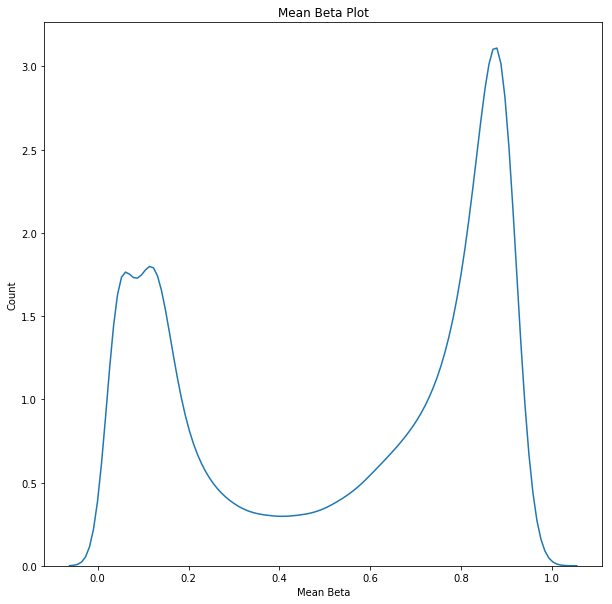

In [8]:
postQC.meanBetaPlot(b_values)

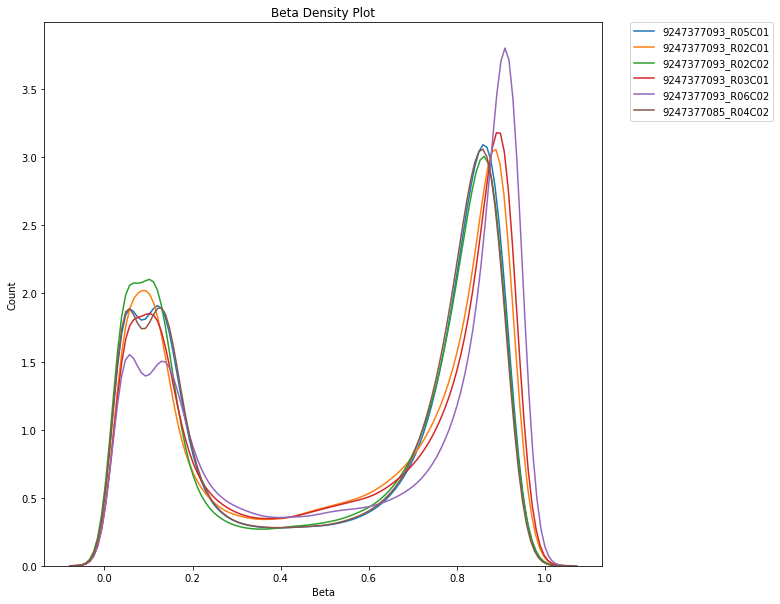

In [9]:
postQC.betaDensityPlot(b_values)

In [10]:
mapped_b_values = postprocess.mapToGenome(df=b_values,rgset=RGset)
mapped_b_values.head()

,Name,9247377093_R05C01,9247377093_R02C01,9247377093_R02C02,9247377093_R03C01,9247377093_R06C02,9247377085_R04C02,Chr,Strand,GenomeBuild,MapInfo
1,cg17415265,0.445072,0.791443,0.496163,0.813146,0.831053,0.448075,17,F,37.0,63225111.0
2,cg26524552,0.731726,0.499337,0.697864,0.512898,0.515284,0.740595,1,R,37.0,65616297.0
3,cg14892066,0.220877,0.134259,0.199309,0.155926,0.203328,0.197944,4,R,37.0,183839263.0
4,cg10581012,0.831172,0.864543,0.865432,0.844645,0.880403,0.831437,11,F,37.0,110384827.0
5,cg24773532,0.823518,0.687947,0.834907,0.744177,0.781417,0.795704,5,F,37.0,3764228.0


In [11]:
sexless_mapped_b_values = mapped_b_values[(mapped_b_values['Chr']!='X') & (mapped_b_values['Chr']!='Y')].copy(deep=True)
sexless_mapped_b_values.dropna(how='any',inplace=True)
sexless_mapped_b_values.head()

,Name,9247377093_R05C01,9247377093_R02C01,9247377093_R02C02,9247377093_R03C01,9247377093_R06C02,9247377085_R04C02,Chr,Strand,GenomeBuild,MapInfo
1,cg17415265,0.445072,0.791443,0.496163,0.813146,0.831053,0.448075,17,F,37.0,63225111.0
2,cg26524552,0.731726,0.499337,0.697864,0.512898,0.515284,0.740595,1,R,37.0,65616297.0
3,cg14892066,0.220877,0.134259,0.199309,0.155926,0.203328,0.197944,4,R,37.0,183839263.0
4,cg10581012,0.831172,0.864543,0.865432,0.844645,0.880403,0.831437,11,F,37.0,110384827.0
5,cg24773532,0.823518,0.687947,0.834907,0.744177,0.781417,0.795704,5,F,37.0,3764228.0


In [12]:
X_true = sexless_mapped_b_values.drop(columns=['Name','Chr','Strand','GenomeBuild','MapInfo']).copy(deep=True).transpose()
X_true.head()

,1,2,3,4,5,6,7,8,9,10,...,485583,485584,485585,485586,485587,485588,485589,485590,485591,485592
9247377093_R05C01,0.445072,0.731726,0.220877,0.831172,0.823518,0.617503,0.882358,0.088190,0.151033,0.055478,...,0.117445,0.220557,0.881438,0.896220,0.918768,0.239094,0.671988,0.751613,0.145362,0.172111
9247377093_R02C01,0.791443,0.499337,0.134259,0.864543,0.687947,0.413853,0.890113,0.076950,0.774845,0.115694,...,0.100722,0.201674,0.874170,0.899423,0.952968,0.215599,0.786164,0.758660,0.388183,0.140422
9247377093_R02C02,0.496163,0.697864,0.199309,0.865432,0.834907,0.526999,0.881795,0.089087,0.179880,0.054439,...,0.106218,0.224517,0.868002,0.879058,0.935977,0.217649,0.596321,0.711570,0.143403,0.144567
9247377093_R03C01,0.813146,0.512898,0.155926,0.844645,0.744177,0.452094,0.904721,0.090551,0.769619,0.091735,...,0.112088,0.217448,0.879704,0.908487,0.944271,0.219929,0.818544,0.761194,0.351798,0.129289
9247377093_R06C02,0.831053,0.515284,0.203328,0.880403,0.781417,0.488102,0.926464,0.093157,0.833619,0.091728,...,0.134504,0.219172,0.910756,0.922666,0.946262,0.238847,0.893345,0.771781,0.495325,0.194425


In [13]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

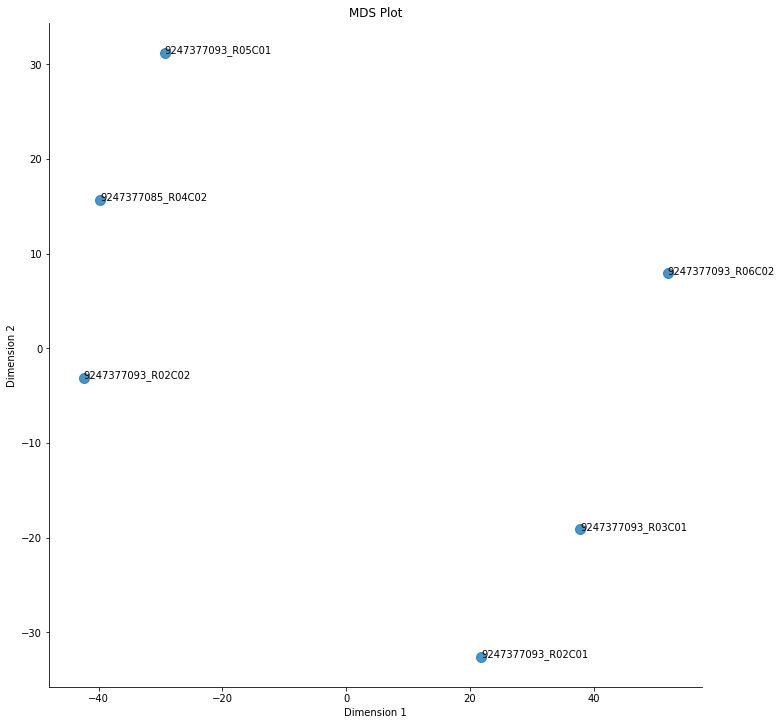

In [14]:
similarities = euclidean_distances(X_true)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=42,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_
# version 1
df = pd.DataFrame({'Dimension 1': pos[:, 0],
                  'Dimension 2': pos[:, 1]},index=X_true.index)
ax = sns.lmplot(x='Dimension 1',y='Dimension 2',data=df,scatter_kws={'s':100},fit_reg=False,size=10)

plt.title('MDS Plot')
labels = X_true.index.values.tolist()

for i, point in df.iterrows():
    plt.text(point['Dimension 1']+.02, point['Dimension 2'], str(i))

In [15]:
import umap

pos = umap.UMAP().fit_transform(X_true)

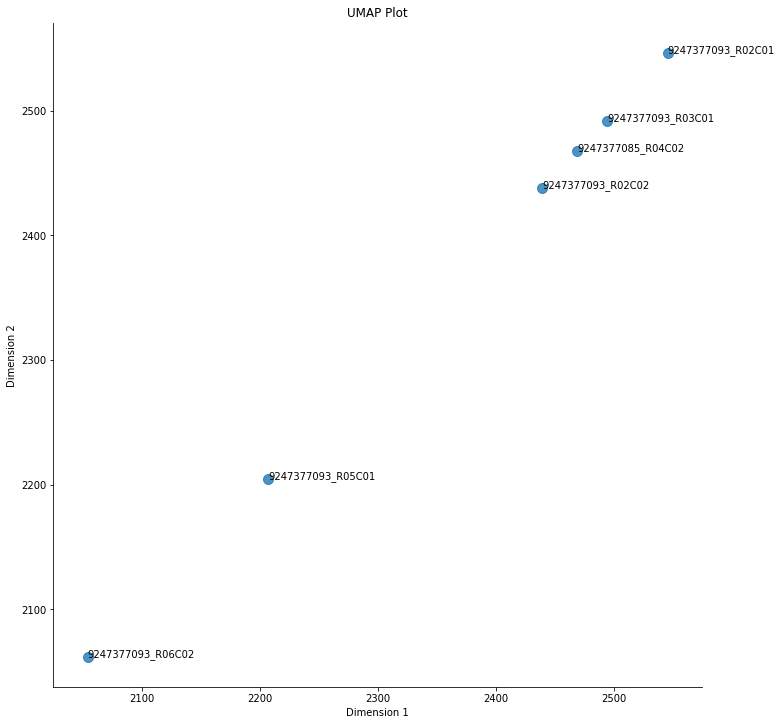

In [16]:
df = pd.DataFrame({'Dimension 1': pos[:, 0],
                  'Dimension 2': pos[:, 1]},index=X_true.index)
ax = sns.lmplot(x='Dimension 1',y='Dimension 2',data=df,scatter_kws={'s':100},fit_reg=False,size=10)

plt.title('UMAP Plot')
labels = X_true.index.values.tolist()

for i, point in df.iterrows():
    plt.text(point['Dimension 1']+.02, point['Dimension 2'], str(i))